<h1 style="font-size:36px; font-family:'Times New Roman', serif; color:#333333;text-align:center;">
  Individual Project
</h1>

<p style="text-align:center; font-size:18px; color:#555;">
  Zebin You
</p>

<h1 style="font-size:28px; font-family:'Times New Roman', serif; color:#333333;">
  1. Main Question
</h1>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  (1) How have global $\mathrm{CO}_2$ emission rates changed over time? In particular for the US, and how does the US compare to other countries?<br>
  (2) Are $\mathrm{CO}_2$ emissions in the US, global temperatures, and natural disaster rates in the US associated?
</p>

<h1 style="font-size:28px; font-family:'Times New Roman', serif; color:#333333;">
  2. What Is the Data
</h1>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  In this case, we will use data related to $\mathrm{CO}_2$ emissions, and it includes data regarding percent yearly growth of GDP per capita, energy use per person, which are extracted from Gapminder that was originally obtained from the World Bank. Besides, there is also data of US natural disasters and temperature from the National Oceanic and Atmospheric Administration (NOAA), which is an agency that collects weather and climate data.<br>
    All raw data mentioned above are uploaded to a github repository saved as CSV or Excel files.
</p>

<h1 style="font-size:28px; font-family:'Times New Roman', serif; color:#333333;">
  3. Data Import
</h1>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  The data can be imported by the url links which connect the github repository storing the data files.
</p>

In [1]:
import pandas as pd
import numpy as np
co2=pd.read_excel('https://raw.githubusercontent.com/YSYK-KKNM/project-data/main/yearly_co2_emissions_1000_tonnes.xlsx')
gdp=pd.read_excel('https://raw.githubusercontent.com/YSYK-KKNM/project-data/main/gdp_per_capita_yearly_growth.xlsx')
energy=pd.read_excel('https://raw.githubusercontent.com/YSYK-KKNM/project-data/main/energy_use_per_person.xlsx')
disaster=pd.read_csv('https://raw.githubusercontent.com/YSYK-KKNM/project-data/main/disasters2.csv',skiprows=2)
temperature=pd.read_csv('https://raw.githubusercontent.com/YSYK-KKNM/project-data/main/temperature.csv', skiprows=4, na_values="-99")

<h1 style="font-size:28px; font-family:'Times New Roman', serif; color:#333333;">
  4. Data Wrangling
</h1>

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  4.1 Yearly $\mathrm{CO}_2$ Emissions
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  The raw data of yearly $\mathrm{CO}_2$ emissions is converted to a dataframe with columns 'Country', 'Year', 'Emissions' and 'Label'. The first five rows of data are demonstrated in the output.
</p>

In [2]:
co2= co2.melt(id_vars='country', var_name='Year', value_name='Emissions')
co2.rename(columns={'country': 'Country'}, inplace=True)
co2['Year']=co2['Year'].astype(int)
co2['Label']='CO2 Emissions (Metric Tons)'
co2.head()

,Country,Year,Emissions,Label
0,Afghanistan,1751,NaN,CO2 Emissions (Metric Tons)
1,Albania,1751,NaN,CO2 Emissions (Metric Tons)
2,Algeria,1751,NaN,CO2 Emissions (Metric Tons)
3,Andorra,1751,NaN,CO2 Emissions (Metric Tons)
4,Angola,1751,NaN,CO2 Emissions (Metric Tons)


<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  4.2 Yearly Growth in GDP per Capita
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  We can take a look at the number of rows and columns of the raw data.
</p>

In [3]:
print(gdp.shape)

(194, 220)


<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  Then, we convert it into the dataframe which is similar to the one made in 4.1.
</p>

In [4]:
gdp=gdp.melt(id_vars='country', var_name='Year',value_name='gdp_growth')
gdp=gdp.rename(columns={'country': 'Country'})
gdp['Year']=gdp['Year'].astype(int)
gdp['Label']='GDP Growth/Capita (%)'
gdp=gdp.rename(columns={'gdp_growth': 'GDP'})
gdp.head()

,Country,Year,GDP,Label
0,Afghanistan,1801,NaN,GDP Growth/Capita (%)
1,Albania,1801,0.10400,GDP Growth/Capita (%)
2,Algeria,1801,-0.00247,GDP Growth/Capita (%)
3,Andorra,1801,0.16600,GDP Growth/Capita (%)
4,Angola,1801,0.42500,GDP Growth/Capita (%)


<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  4.3 Energy Use Per Person
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  Now we do the same operation on the raw data of energy use per person.
</p>

In [5]:
energy=energy.melt(id_vars='country',var_name='Year',value_name='energy_use')
energy=energy.rename(columns={'country':'Country','energy_use':'Energy'})
energy['Year']=energy['Year'].astype(int)
energy['Label']="Energy Use (kg,oil-eq./capita)"
energy.head()

,Country,Year,Energy,Label
0,Albania,1960,NaN,"Energy Use (kg,oil-eq./capita)"
1,Algeria,1960,NaN,"Energy Use (kg,oil-eq./capita)"
2,Angola,1960,NaN,"Energy Use (kg,oil-eq./capita)"
3,Antigua and Barbuda,1960,NaN,"Energy Use (kg,oil-eq./capita)"
4,Argentina,1960,NaN,"Energy Use (kg,oil-eq./capita)"


In [6]:
sample=energy.sample(n=3, random_state=123)
sample

,Country,Year,Energy,Label
1018,Argentina,1966,NaN,"Energy Use (kg,oil-eq./capita)"
6375,Russia,1997,4070.0,"Energy Use (kg,oil-eq./capita)"
2803,Morocco,1976,235.0,"Energy Use (kg,oil-eq./capita)"


<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  4.4 Disasters of USA
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  Since we are only interested in the number of disasters that have taken place, we can screen out the columns containing the string 'Count'.
</p>

In [7]:
cols=['Year']+[col for col in disaster.columns if 'Count' in col]
disaster=disaster[cols]
disaster.head()

,Year,Drought Count,Flooding Count,Freeze Count,Severe Storm Count,Tropical Cyclone Count,Wildfire Count,Winter Storm Count,All Disasters Count
0,1980,1,1,0,0,1,0,0,3
1,1981,0,0,1,1,0,0,0,2
2,1982,0,0,0,2,0,0,1,3
3,1983,1,3,1,0,1,0,0,6
4,1984,0,0,0,2,0,0,0,2


<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  We can now calculate the sum of all disasters that have taken place in USA every year.
</p>

In [8]:
disasters=disaster[['Year', 'All Disasters Count']].copy()
disasters['Country']='United States'
disasters= disasters.melt(id_vars=['Year', 'Country'],var_name='Indicator',value_name='Value')
disasters['Label']='Number of Disasters'
disasters.head(6)

,Year,Country,Indicator,Value,Label
0,1980,United States,All Disasters Count,3,Number of Disasters
1,1981,United States,All Disasters Count,2,Number of Disasters
2,1982,United States,All Disasters Count,3,Number of Disasters
3,1983,United States,All Disasters Count,6,Number of Disasters
4,1984,United States,All Disasters Count,2,Number of Disasters
5,1985,United States,All Disasters Count,7,Number of Disasters


<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  4.5 Temperature
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  The date recorded in the raw data is too long, so we cut it and only keep the year of the date.
</p>

In [9]:
temperature['Date']=temperature['Date'].astype(str)
temperature['Year']=temperature['Date'].str[:4].astype(int)

In [10]:
temperature['Country']='United States'
temperature['Indicator']='Temperature'
temperature['Label']='Temperature (Fahrenheit)'
temperature=temperature[['Year', 'Country', 'Indicator', 'Value', 'Label']]
temperature.head()

,Year,Country,Indicator,Value,Label
0,1895,United States,Temperature,50.34,Temperature (Fahrenheit)
1,1896,United States,Temperature,51.99,Temperature (Fahrenheit)
2,1897,United States,Temperature,51.56,Temperature (Fahrenheit)
3,1898,United States,Temperature,51.43,Temperature (Fahrenheit)
4,1899,United States,Temperature,51.01,Temperature (Fahrenheit)


<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  4.6 Joining Data
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
   Now we are going to combine all the data above for further visualization and analysis.<br>
   At first, we should adjust and standardize the format of those datasets in order to concat them smoothly.
</p>

In [11]:
co2=co2.rename(columns={'Emissions':'Value'})
co2['Indicator']='Emissions'
gdp=gdp.rename(columns={'GDP':'Value'})
gdp['Indicator']='GDP'
energy=energy.rename(columns={'Energy':'Value'})
energy['Indicator']='Energy'

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
   Then,we can concat these datasets and add a column 'Region' to separate the data of USA from that of other countries.
</p>

In [12]:
combined=pd.concat([co2, gdp, energy, disasters, temperature], ignore_index=True)
combined['Region']=combined['Country'].apply(lambda x:'United States' if x=='United States' else 'Rest of the world')
##we drop the missing values and sort it by 'Country'
combined=combined.dropna().sort_values(by='Country')
combined.head()

,Country,Year,Value,Label,Indicator,Region
40896,Afghanistan,1964,840.000,CO2 Emissions (Metric Tons),Emissions,Rest of the world
87160,Afghanistan,1989,-2.410,GDP Growth/Capita (%),GDP,Rest of the world
86190,Afghanistan,1984,-1.830,GDP Growth/Capita (%),GDP,Rest of the world
43392,Afghanistan,1977,2390.000,CO2 Emissions (Metric Tons),Emissions,Rest of the world
64074,Afghanistan,1870,0.325,GDP Growth/Capita (%),GDP,Rest of the world


<h1 style="font-size:28px; font-family:'Times New Roman', serif; color:#333333;">
  5. Data Visualization
</h1>

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  5.1 Country $\mathrm{CO}_2$ Emissions per Year (1751–2014)
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
   Now we can visualize the data wrangled. The following code aims to make a chart illustrating how $\mathrm{CO}_2$ emissions have changed over time in each country. In particular, the data of the United States is highlighted by a blue line.
</p>

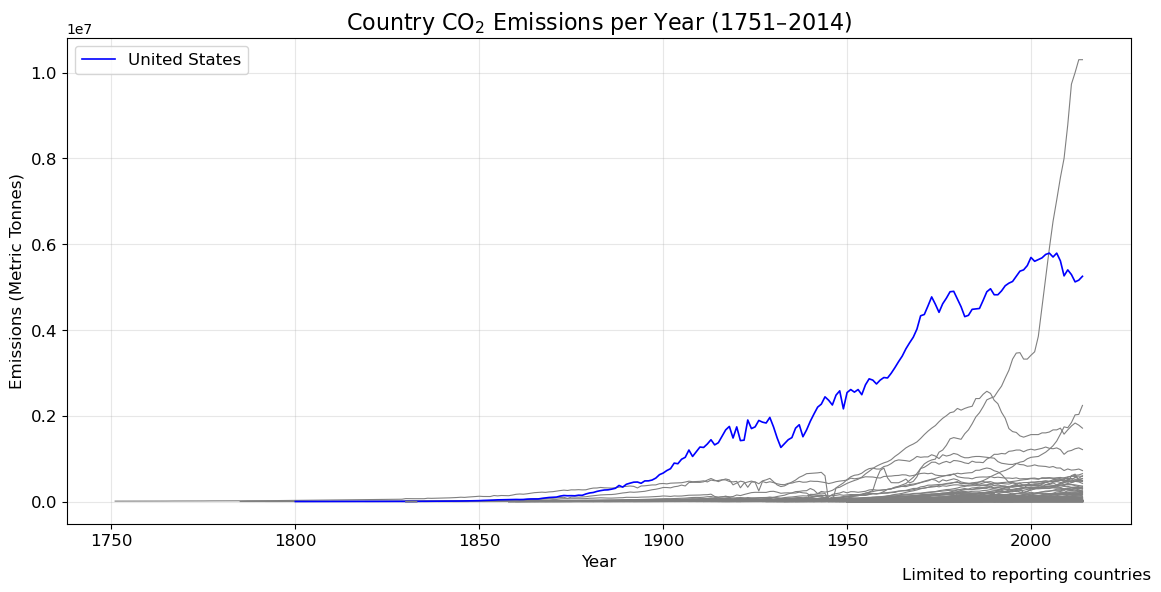

In [13]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(12,6))
for country in co2['Country'].unique():
    xf=co2.loc[co2['Country']==country]
    ax.plot(xf['Year'],xf['Value'],alpha=1,
            color='blue' if country=='United States' else 'gray',
            linewidth=1.2 if country=='United States' else 0.8,
            label='United States' if country=='United States' else None)
##add title,labels for the plot    
ax.set_title('Country $\mathrm{CO}_2$ Emissions per Year (1751–2014)',fontsize=16)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Emissions (Metric Tonnes)',fontsize=12)
## add a legend for USA in order to highlight
ax.legend(fontsize=12)                        
ax.text(0.785, -0.114,'Limited to reporting countries',transform=ax.transAxes,fontsize=12)
ax.tick_params(labelsize=12)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  5.2 Top 10 Emissions-producing Countries in 2010 (1900-2014)
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  In this part, we are going to figure out the top 10 emission producing countries in 2014, and a chart is going to be made to demonstrate the how $\mathrm{CO}_2$
 emissions have changed over time in these countries.
</p>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  We first select all the emission data of 2014 and rank them.<br>
    In the following code, 'd2014' is a dataframe including data regarding emissions in only 2014 while 'top' is a dataframe picking out top 10 emission producing countries in 2014.
</p>

In [14]:
d2014=co2[co2['Year']==2014].copy()
d2014['rank']=d2014['Value'].rank(ascending=False)
top=d2014[d2014['rank']<=10]
top

,Country,Year,Value,Label,Indicator,rank
50526,Canada,2014,537000.0,CO2 Emissions (Metric Tons),Emissions,10.0
50531,China,2014,10300000.0,CO2 Emissions (Metric Tons),Emissions,1.0
50559,Germany,2014,720000.0,CO2 Emissions (Metric Tons),Emissions,6.0
50571,India,2014,2240000.0,CO2 Emissions (Metric Tons),Emissions,3.0
50573,Iran,2014,649000.0,CO2 Emissions (Metric Tons),Emissions,7.0
50579,Japan,2014,1210000.0,CO2 Emissions (Metric Tons),Emissions,5.0
50636,Russia,2014,1710000.0,CO2 Emissions (Metric Tons),Emissions,4.0
50640,Saudi Arabia,2014,601000.0,CO2 Emissions (Metric Tons),Emissions,8.0
50651,South Korea,2014,587000.0,CO2 Emissions (Metric Tons),Emissions,9.0
50679,United States,2014,5250000.0,CO2 Emissions (Metric Tons),Emissions,2.0


<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  Next, we will extract the data from 1900 to 2014 of these 10 countries, which is included in a new dataframe 'etop'.
</p>

In [15]:
etop=co2[(co2['Country'].isin(top['Country']))&(co2['Year']>=1900)].copy()

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  After obtaining the data we want, we can draw the plot now.
</p>

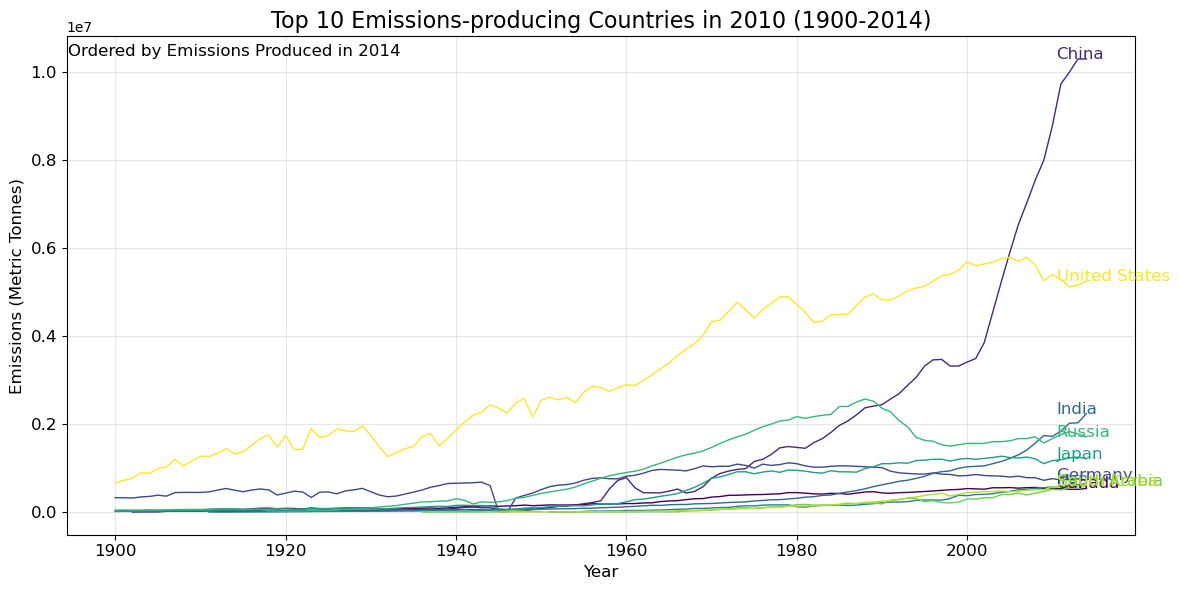

In [16]:
##we should set the list of color first since every line needs to be colored differenly.
import matplotlib.cm as cm
cns=etop['Country'].unique()
colors=cm.viridis(np.linspace(0,1,len(cns)))
##After determining the colors for the lines, we can start making the plot                  
fig,ax=plt.subplots(figsize=(12,6))
for i,country in enumerate(cns):
    yf=etop.loc[etop['Country']==country]
    ax.plot(yf['Year'],yf['Value'],color=colors[i],linewidth=1,alpha=1,label=country)
    ax.text(yf['Year'].iloc[-1]-3.5, yf['Value'].iloc[-1],country, fontsize=12,color=colors[i])
##add title,labels,legends for the plot    
ax.set_title('Top 10 Emissions-producing Countries in 2010 (1900-2014)',fontsize=16)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Emissions (Metric Tonnes)',fontsize=12)
ax.text(0.001,0.96, 'Ordered by Emissions Produced in 2014',transform=ax.transAxes,fontsize=12)
ax.tick_params(labelsize=12)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  5.3 Tile Plot of the Top 10 $\mathrm{CO}_2$ Emission-producing Countries
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  A tile plot is demonstrated as follows, which vividly illustrate the change of $\mathrm{CO}_2$ emission of the 10 countries since 1900.
</p>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  Before producing the tile plot, we may merge the dataframe 'etop' (which includes emission data of the 10 countries since 1900) and the dataframe 'top' (which includes the rank of the 10 countries).This will help us make the bars on the plot in a certain order.<br>
And 'mapdata' is the well-prepared dataframe that we will use for plotting.
</p>

In [17]:
etop['loge']=np.log(etop['Value'])
tp=top[['Country','rank']]
etop=etop.merge(tp,on='Country',how='left')
etop.sort_values(['rank', 'Year'],inplace=True)
mapdata=etop.pivot(index='Country',columns='Year',values='loge')
mapdata.head()

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,,,,,,,,,,
Canada,9.933046,10.081634,10.154246,10.239960,10.407289,10.474467,10.529426,10.757903,10.766378,10.723267,...,13.230321,13.206705,13.224920,13.237476,13.193753,13.190022,13.193753,13.155798,13.155798,13.193753
China,NaN,NaN,4.557030,7.585789,7.644919,7.740664,9.746834,9.735069,10.034516,9.947504,...,15.590463,15.691918,15.765697,15.837058,15.894952,15.987987,16.090724,16.118096,16.147654,16.147654
Germany,12.697715,12.694653,12.672946,12.748397,12.782686,12.855790,12.799399,13.001325,13.010314,13.008074,...,13.588610,13.612170,13.568330,13.568330,13.489780,13.539757,13.503536,13.514405,13.537119,13.487006
India,9.480368,9.574983,9.674074,9.692767,9.803667,9.825526,9.971146,10.077441,10.214642,10.177324,...,14.014361,14.077875,14.159100,14.266586,14.369396,14.357835,14.425276,14.518608,14.523546,14.621986
Iran,NaN,NaN,NaN,NaN,NaN,NaN,1.300192,NaN,NaN,NaN,...,13.058358,13.140203,13.159659,13.203021,13.224920,13.258641,13.286181,13.324488,13.337475,13.383188


<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  Now we can make the tile plot using seaborn.
</p>

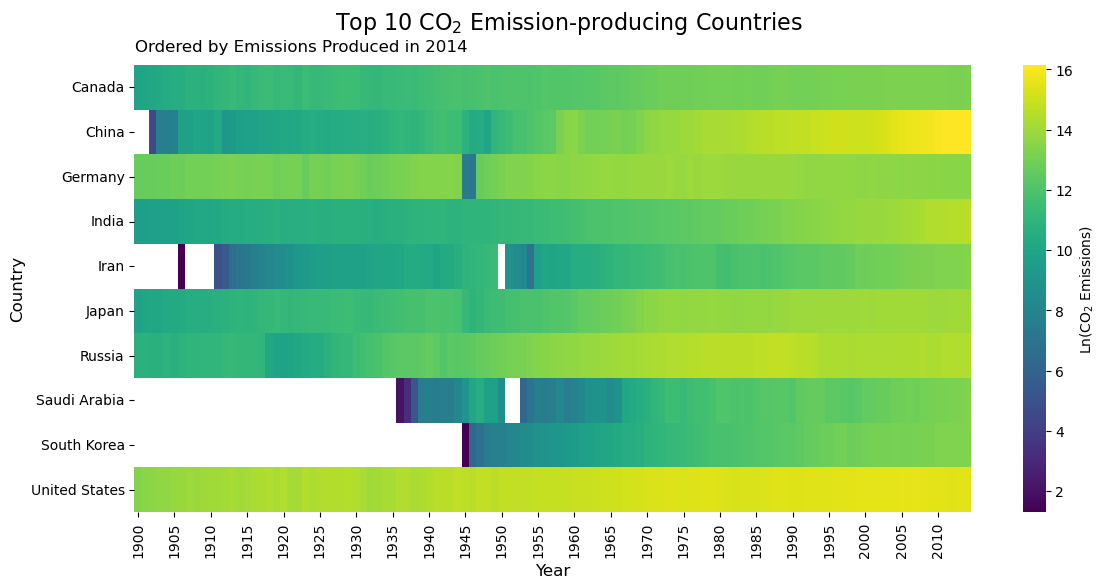

In [18]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(mapdata,cmap='viridis',cbar_kws={'label':'Ln($\mathrm{CO}_2$ Emissions)'},xticklabels=5)
##In this part of code, we can use ax.text to insert title in case it overlaps the sentence under it.
ax.text(0.24, 1.08, 'Top 10 $\mathrm{CO}_2$ Emission-producing Countries', fontsize=16, transform=ax.transAxes)
ax.text(0.001, 1.03, 'Ordered by Emissions Produced in 2014', fontsize=12, transform=ax.transAxes)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Country',fontsize=12)
plt.xticks()
plt.tight_layout()
plt.show()

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  5.4 Facet figure: Distributions of Indicators By Year And Value
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  In order to present the variations of emissions, energy as well as GDP growth simultaneously, we need to make a facet figure. It also highlights the difference of these variations between USA and other countries.<br>
    In addition to matplotlib, seaborn is also used in this part of coding in order to make the lineplots clearer.
</p>

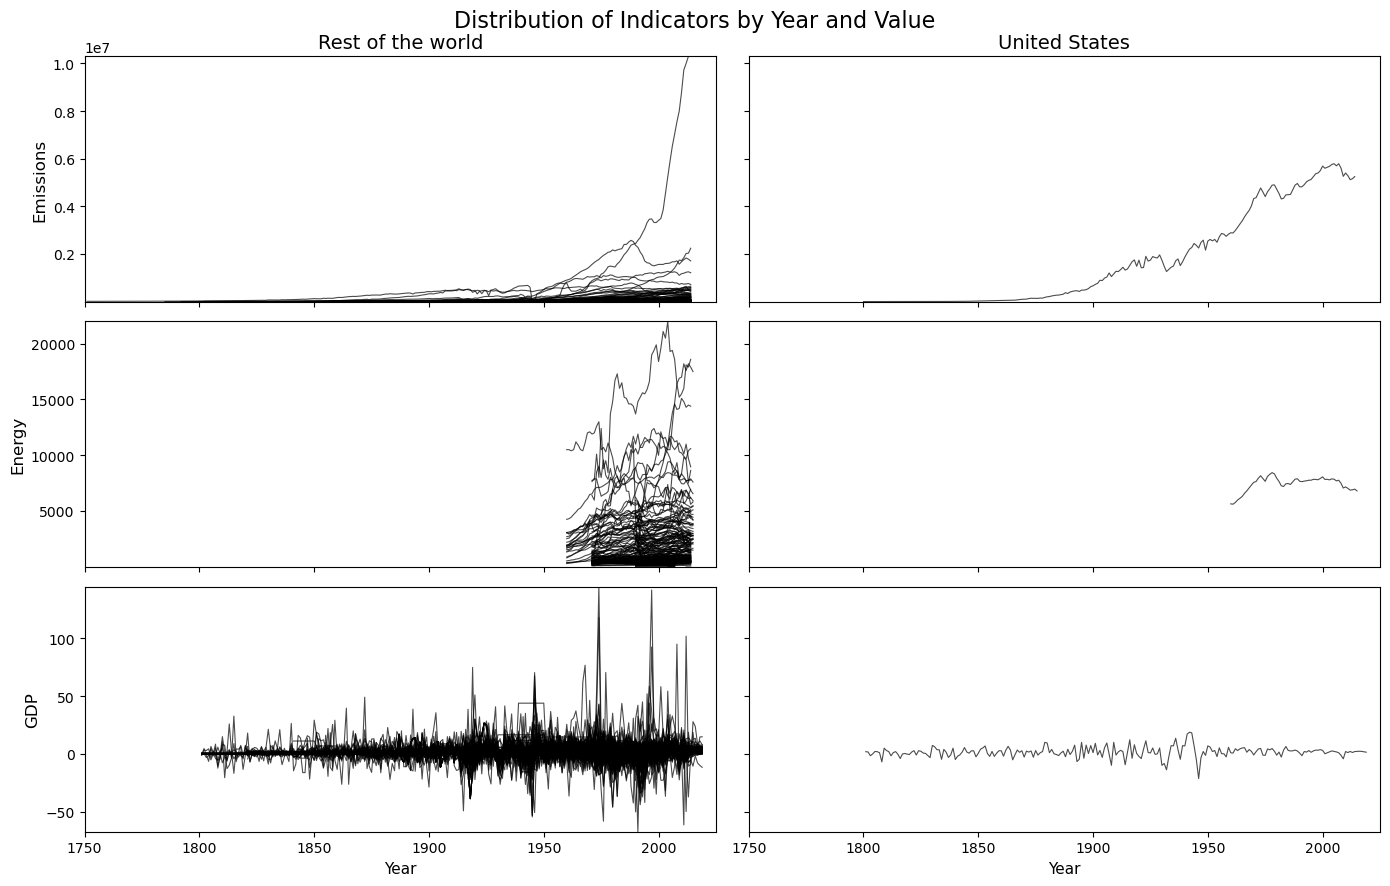

In [19]:
fig,axes=plt.subplots(3,2, figsize=(14, 9), sharex='col',sharey='row')
indicators=['Emissions', 'Energy', 'GDP']
regions=['Rest of the world', 'United States']
## We have to keep the axis scale of plots in the same column or row the same, so we need to limit the scale of the plots in advance.
xl=(1750, 2025)
yl=[]
for indicator in indicators:
    lm=combined[combined['Indicator']==indicator]
    yl.append((lm['Value'].min(), lm['Value'].max()))
##Now we can complet the plots by traversing every 'axes' with the data of certain indicators and regions.
for i, indicator in enumerate(indicators):
    for j, region in enumerate(regions):
        ax=axes[i, j]
        zf=combined[(combined['Indicator']==indicator)&(combined['Region']==region)]
        for country in zf['Country'].unique():
            wf=zf[zf['Country']==country]
            sns.lineplot(data=wf, x='Year', y='Value', ax=ax,color='black', linewidth=0.8, alpha=0.7)
        ax.set_xlim(xl)
        ax.set_ylim(yl[i]) 
##applying different labels in the corresponding space on the plot.
        if i==0:
            ax.set_title(region, fontsize=14,)
        if j==0:
            ax.set_ylabel(indicator, fontsize=12)
        if i==2:
            ax.set_xlabel('Year', fontsize=11)        
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Distribution of Indicators by Year and Value', fontsize=16)
plt.show()

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  5.5 Relationship between Variations of Emission Levels And Temperature in USA
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  In this part, we pay more attention to the relationship between the variation of emissions and temperature in USA.<br>
We now first have to observe the patterns of the variation of emission levels and average annual temperatures over time.
</p>

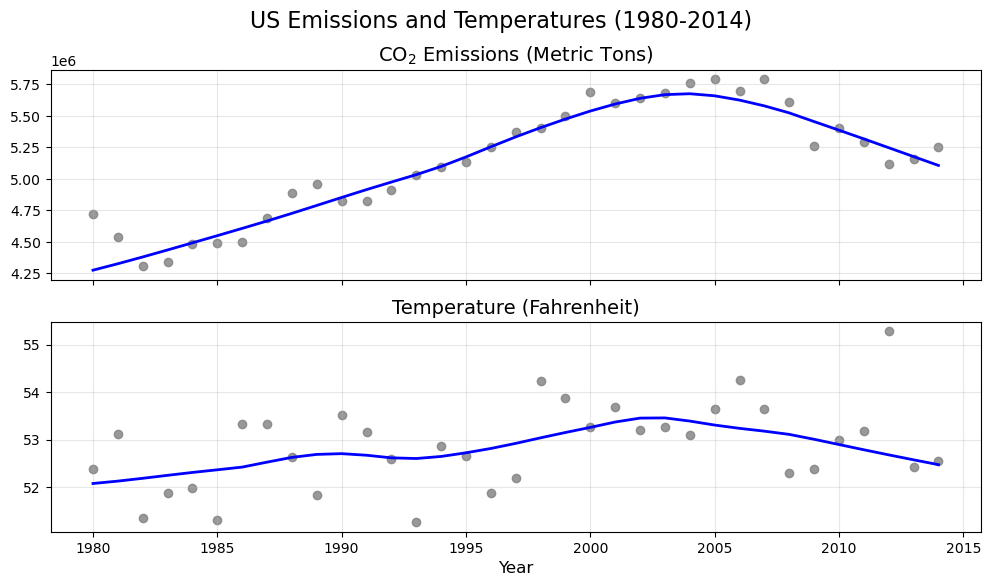

In [20]:
##!pip install statsmodels
import statsmodels.api as sm
## prepare a dataframe 'us' including emissions and temperature of us over time
us=combined[(combined['Country']=='United States')&(combined['Year'].between(1980,2014))&(combined['Indicator'].isin(['Emissions', 'Temperature']))]

fig, axes=plt.subplots(2, 1, figsize=(12, 6), sharex=True)
tit=['$\mathrm{CO}_2$ Emissions (Metric Tons)', 'Temperature (Fahrenheit)']
for i, indicate in enumerate(['Emissions', 'Temperature']):
    tf=us[us['Indicator']==indicate]
    axes[i].scatter(tf['Year'], tf['Value'], alpha=0.8, color='gray')
##create the trend lines using statsmodels
    tr=sm.nonparametric.lowess
    trc=tr(tf['Value'], tf['Year'],frac=0.4)
    axes[i].plot(trc[:, 0], trc[:, 1], color='blue', linewidth=2)
    axes[i].set_title(tit[i], fontsize=14)
    axes[i].grid(alpha=0.3)  
axes[1].set_xlabel('Year', fontsize=12)
plt.suptitle('US Emissions and Temperatures (1980-2014)', fontsize=16)
plt.show()

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  To explore the relationship between temperature and emissions, we can use linear regression models to demonstrate its pattern.
</p>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  Before applying the model, we first creat a dataframe 'li_us' which includes data regarding emissions and temperature of USA over time.
</p>

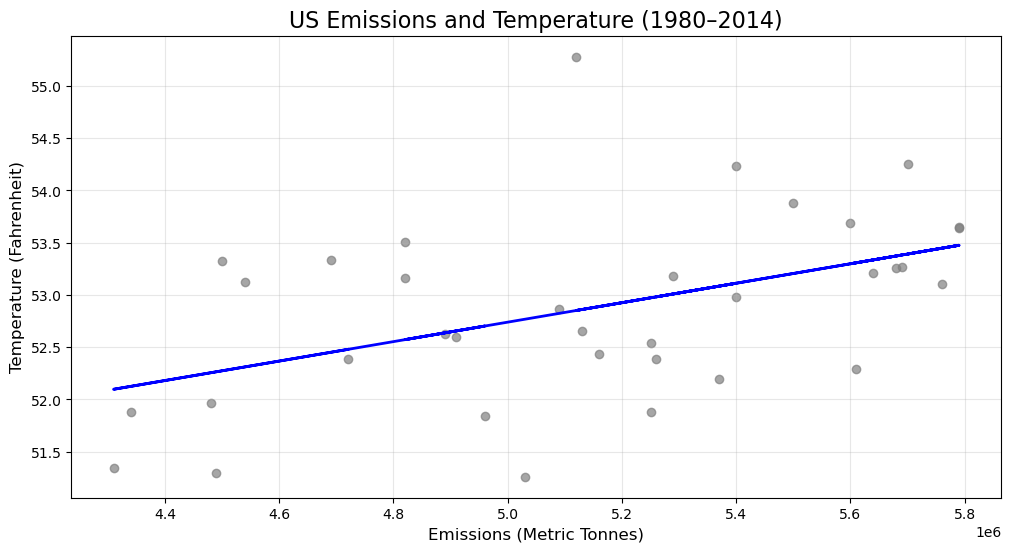

In [21]:
li_us=us.pivot(index='Year', columns='Indicator', values='Value').reset_index()
x=li_us['Emissions']
y=li_us['Temperature']
##use model to conduct regression
x=sm.add_constant(x)
model=sm.OLS(y, x)
results=model.fit()
## make the scatter plot and apply the regression line on it.
liy=results.predict(x)
plt.figure(figsize=(12, 6))
plt.scatter(li_us['Emissions'], li_us['Temperature'], color='gray', alpha=0.7)
plt.plot(li_us['Emissions'], liy, color='blue', linewidth=2)
plt.title('US Emissions and Temperature (1980–2014)', fontsize=16)
plt.xlabel('Emissions (Metric Tonnes)', fontsize=12)
plt.ylabel('Temperature (Fahrenheit)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

<h1 style="font-size:28px; font-family:'Times New Roman', serif; color:#333333;">
  6. Data Analysis
</h1>

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  6.1 Mean And SD for Emissions and Temperature
</h2>

In [22]:
emission_mean=li_us['Emissions'].mean()
emission_sd=li_us['Emissions'].std()
temperature_mean=li_us['Temperature'].mean()
temperature_sd=li_us['Temperature'].std()
print('Emissions Mean:', round(emission_mean, 2))
print('Emissions SD:', round(emission_sd, 2))
print('Temperature Mean:', round(temperature_mean, 2))
print('Temperature SD:', round(temperature_sd, 2))

Emissions Mean: 5142285.71
Emissions SD: 450549.24
Temperature Mean: 52.87
Temperature SD: 0.89


<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  Through the output above, we know that the mean and the standard deviation of emissions in USA are 5142285.71 and 450549.24, while the mean and the standard deviation of temperature in USA are 52.87 and 0.89. 
</p>

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  6.2 Correlation Coefficient for Emissions And Temperature
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  We use the dataframe 'li_us' which was created in 5.5 to calculate the corrrelation coefficient.
</p>

In [23]:
li_us['Emissions'].corr(li_us['Temperature'])

np.float64(0.4711717061539188)

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  The output above implies that the correlation coefficient for emissions and temperature is 0.4712.
</p>

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  6.3 Regression for Scaled Temperature And Scaled $\mathrm{CO}_2$ Emissions of USA Over Time
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
  Coding of this part is similar to that of 5.5, but we have to standardize the data using StandardScaler before making the plot.
</p>

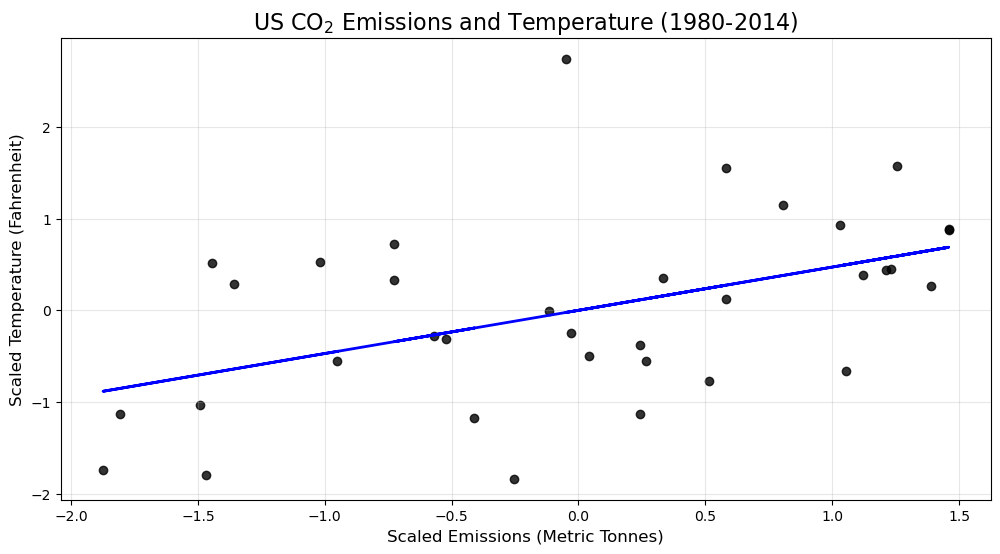

In [24]:
from sklearn.preprocessing import StandardScaler
df=li_us.copy()
##use StandardScaler to standardize the data
scaler=StandardScaler()
df[['sc_emissions', 'sc_temperature']]=scaler.fit_transform(df[['Emissions', 'Temperature']])
X=df['sc_emissions']
y=df['sc_temperature']
##use model to conduct regression
X=sm.add_constant(X)
model=sm.OLS(y, X)
results=model.fit()
## make the scatter plot and apply the regression line on it.
y_sc=results.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(df['sc_emissions'], df['sc_temperature'], label='Standardized CO₂ Emissions', color='black', alpha=0.8)
plt.plot(df['sc_emissions'], y_sc, color='blue', linewidth=2)
plt.title('US $\mathrm{CO}_2$ Emissions and Temperature (1980-2014)', fontsize=16)
plt.xlabel('Scaled Emissions (Metric Tonnes)', fontsize=12)
plt.ylabel('Scaled Temperature (Fahrenheit)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

<h1 style="font-size:28px; font-family:'Times New Roman', serif; color:#333333;">
  7. Summary
</h1>

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  7.1 Summary Plot
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
   A summary plot is made to conclude the main outputs achieved above.
</p>

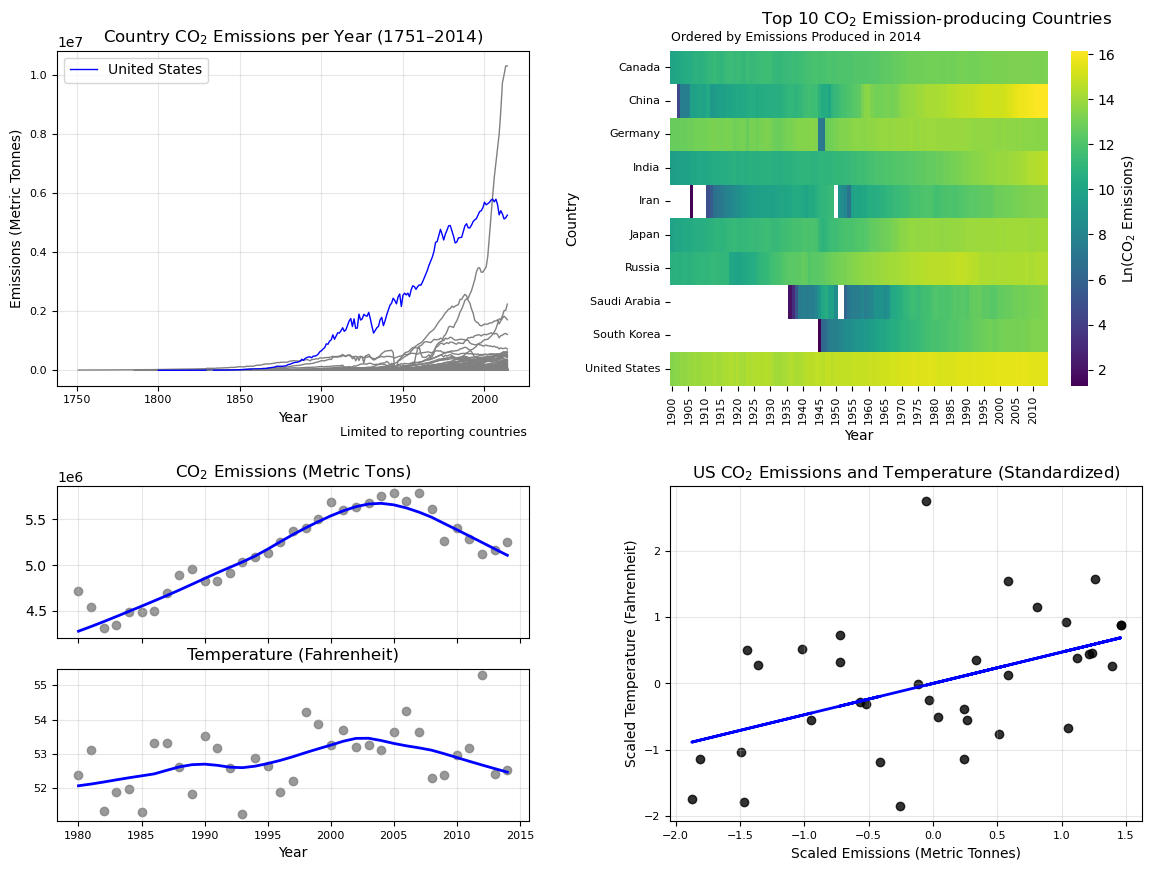

In [25]:
##the composition of the summary plot is complex since the third plot is composed of two subplots itself, so we need to use gridspec to accurately divide the space.
from matplotlib import gridspec as grs
from matplotlib.gridspec import GridSpecFromSubplotSpec as grss
fig=plt.figure(figsize=(14, 10))
gs=grs.GridSpec(2,2, figure=fig,hspace=0.3,wspace=0.3)
##the first plot
ax1=fig.add_subplot(gs[0, 0])
for country in co2['Country'].unique():
    xf=co2.loc[co2['Country']==country]
    ax1.plot(xf['Year'], xf['Value'],alpha=1,linewidth=1,
             color='blue' if country=='United States' else 'gray',
             label='United States' if country=='United States' else None)
ax1.set_title('Country $\mathrm{CO}_2$ Emissions per Year (1751–2014)',fontsize=12)
ax1.set_xlabel('Year',fontsize=10)
ax1.set_ylabel('Emissions (Metric Tonnes)',fontsize=10)
ax1.legend()
ax1.text(0.6,-0.15, 'Limited to reporting countries', transform=ax1.transAxes,fontsize=9)
ax1.tick_params(labelsize=8)
ax1.grid(alpha=0.3)

##the second plot
ax2=fig.add_subplot(gs[0, 1])
sns.heatmap(mapdata, cmap='viridis', cbar_kws={'label': 'Ln($\mathrm{CO}_2$ Emissions)'}, xticklabels=5, ax=ax2)
ax2.text(0.24,1.08, 'Top 10 $\mathrm{CO}_2$ Emission-producing Countries', fontsize=12, transform=ax2.transAxes)
ax2.text(0.001,1.03, 'Ordered by Emissions Produced in 2014', fontsize=9, transform=ax2.transAxes)
ax2.set_xlabel('Year', fontsize=10)
ax2.set_ylabel('Country', fontsize=10)
ax2.tick_params(labelsize=8)

##the third plot (with two subplots)
subgs=grss(2, 1, subplot_spec=gs[1, 0])
ax3u=fig.add_subplot(subgs[0])
ax3d=fig.add_subplot(subgs[1], sharex=ax3u)
titles=['$\mathrm{CO}_2$ Emissions (Metric Tons)', 'Temperature (Fahrenheit)']
for ax, indicate, title in zip([ax3u, ax3d], ['Emissions', 'Temperature'], titles):
    tf=us[us['Indicator']==indicate]
    ax.scatter(tf['Year'], tf['Value'], alpha=0.8, color='gray')
    trs=sm.nonparametric.lowess(tf['Value'], tf['Year'], frac=0.4)
    ax.plot(trs[:, 0], trs[:, 1], color='blue', linewidth=2)
    ax.set_title(title, fontsize=12)
    ax.grid(alpha=0.3)
ax3d.set_xlabel('Year', fontsize=10)
ax3u.tick_params(axis='x',labelbottom=False)
ax3d.tick_params(labelsize=8)

##the fourth plot
ax4=fig.add_subplot(gs[1, 1])
ax4.scatter(df['sc_emissions'], df['sc_temperature'], label='Standardized $\mathrm{CO}_2$ Emissions', color='black', alpha=0.8)
ax4.plot(df['sc_emissions'], y_sc, color='blue', linewidth=2)
ax4.set_title('US $\mathrm{CO}_2$ Emissions and Temperature (Standardized)', fontsize=12)
ax4.set_xlabel('Scaled Emissions (Metric Tonnes)', fontsize=10)
ax4.set_ylabel('Scaled Temperature (Fahrenheit)', fontsize=10)
ax4.grid(alpha=0.3)
ax4.tick_params(labelsize=8)
plt.show()

<h2 style="font-size:20px; font-family:'Times New Roman', serif; color:#333333e;">
  7.2 Synopsis
</h2>

<p style="font-size:16px; font-family:'Times New Roman', serif; color:#333333; line-height:1.6;">
   In this study, we collected data of $\mathrm{CO}_2$ emissions of many countries from 1751 to 2014. We found that the emissions of most countries reported have decreased while a few countries have high levels of emissions.<br>
    We also tried to explore the relationship between $\mathrm{CO}_2$ emissions and some other index such as GDP growth, energy use, the number of disasters have taken place and temperature. The correlation coefficient calculated can show their relevance. We discovered that $\mathrm{CO}_2$ may account for the increase of global temperatures based on their relationship demonstrated in the analysis above. Therefore, it is sensible of us to lay emphasis on containing greenhouse gas emissions, especially $\mathrm{CO}_2$ emissions in order to control the temperature of the world.
</p>